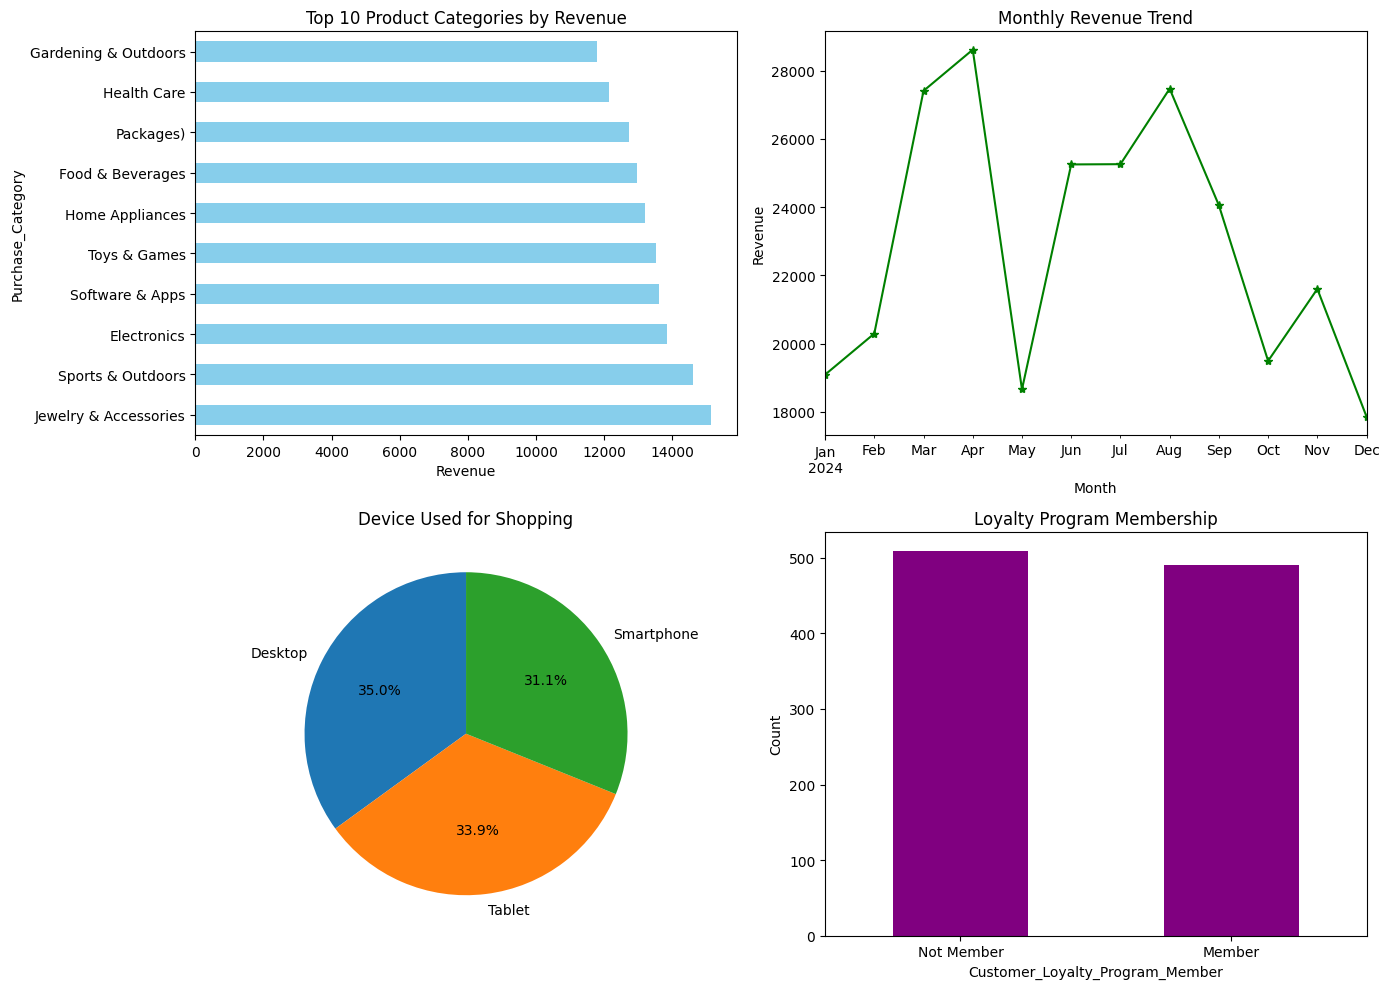

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#to check and create a directory
os.makedirs("images", exist_ok=True)

# Load dataset
df = pd.read_csv("ecommerce_data.csv")

# Data cleaning
df['Purchase_Amount'] = df['Purchase_Amount'].replace('[\$,]', '', regex=True).astype(float)
df['Time_of_Purchase'] = pd.to_datetime(df['Time_of_Purchase'], errors='coerce')
df['Month'] = df['Time_of_Purchase'].dt.to_period('M')

# Revenue per customer
customer_revenue = df.groupby('Customer_ID')['Purchase_Amount'].sum()

# Top 10 products
top_products = df.groupby('Purchase_Category')['Purchase_Amount'].sum().sort_values(ascending=False).head(10)

# Monthly trend
monthly_revenue = df.groupby('Month')['Purchase_Amount'].sum().sort_index()

# Device usage
device_usage = df['Device_Used_for_Shopping'].value_counts()

# Loyalty members
loyalty_counts = df['Customer_Loyalty_Program_Member'].value_counts()

# Visualization
plt.figure(figsize=(14, 10))

# 1. Top products
plt.subplot(2, 2, 1)
top_products.plot(kind='barh', color='skyblue')
plt.title("Top 10 Product Categories by Revenue")
plt.xlabel("Revenue")

# 2. Monthly revenue
plt.subplot(2, 2, 2)
monthly_revenue.plot(marker='*', color='green')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")

# 3. Device usage
plt.subplot(2, 2, 3)
device_usage.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Device Used for Shopping")
plt.ylabel("")

# 4. Loyalty program
plt.subplot(2, 2, 4)
loyalty_counts.plot(kind='bar', color='purple')
plt.title("Loyalty Program Membership")
plt.xticks(ticks=[0, 1], labels=['Not Member', 'Member'], rotation=0)
plt.ylabel("Count")

plt.tight_layout()
plt.savefig("ecommerce_analysis.png")
plt.show()
